In [ ]:
import pandas as pd
import numpy as np

In [ ]:
vaxx_myths_df = pd.read_csv('/Users/mikid/Downloads/vaxx_myths_edit.csv')

In [ ]:
vaxx_myths_df = vaxx_myths_df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [ ]:
import string
import nltk
from nltk.corpus import wordnet
import re
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
# return the wordnet object value corresponding to the POS tag


def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)
# clean text data
vaxx_myths_df["clean_documents"] =vaxx_myths_df["documents"].apply(lambda x: clean_text(x))

In [ ]:
from textblob import TextBlob

In [ ]:
## Create a function to get Subjectivity

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
## Create a function to get Polarity

In [ ]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
vaxx_myths_df['Subjectivity'] =vaxx_myths_df['clean_documents'].apply(getSubjectivity)

In [ ]:
vaxx_myths_df['Polarity'] = vaxx_myths_df['clean_documents'].apply(getPolarity)

In [ ]:
vaxx_myths_df

In [ ]:
allWords = ''.join([documents for documents in vaxx_myths_df['clean_documents']])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# wordcloud function

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    #fig.savefig("wordcloud.png")
    plt.show()
# print wordcloud
#show_wordcloud(vaxx_myths_df["clean_documents"])

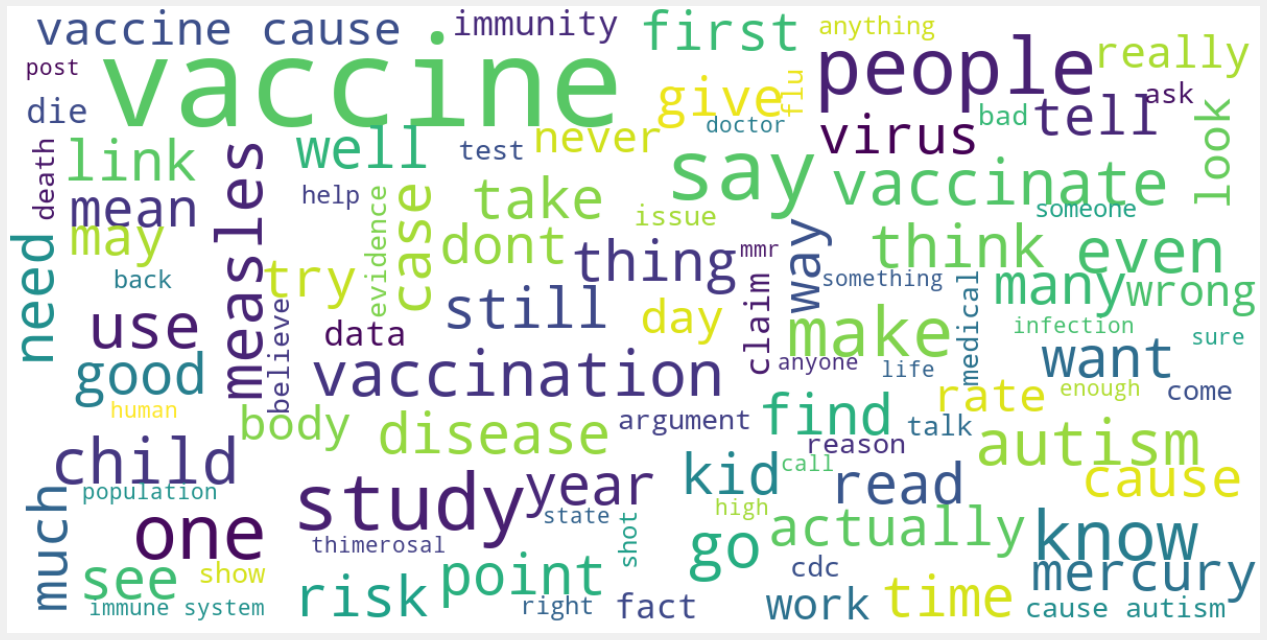

In [30]:
show_wordcloud(allWords)

In [ ]:
## Create a function that will get Positive, Neutral, and Negative Analysis

In [ ]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [ ]:
vaxx_myths_df['Analysis'] = vaxx_myths_df['Polarity'].apply(getAnalysis)

In [ ]:
vaxx_myths_df

In [ ]:
## Print all Positive comments

In [ ]:
j =1
sortedDF = vaxx_myths_df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
 
     
    if (sortedDF['Analysis'][i] =='Positive'):
        print(str(j) +  ') '+sortedDF['clean_documents'][i])
        print()
        j = j+1

In [ ]:
## Print all Negative comments

In [ ]:
j =1
sortedDF = vaxx_myths_df.sort_values(by = ['Polarity'], ascending =False)
for i in range (0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] =='Negative'):
        print(str(j) +  ') '+sortedDF['clean_documents'][i])
        print()
        j = j + 1

In [ ]:
## Plot the Polarity and Subjectivity

In [ ]:
plt.figure(figsize = (8,6))
for i in range (0, vaxx_myths_df.shape[0]):
    
    plt.scatter(vaxx_myths_df['Polarity'][i], vaxx_myths_df['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
vaxx_myths_df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
vaxx_myths_df['Analysis'].value_counts().plot(kind = 'bar')

In [ ]:
## Exploratory Data Analysis

In [ ]:
from collections import defaultdict

dic = defaultdict(int)
counter = )
for word in vaxx_myths_df["clean_documents"][]:
    if word in stop:
        dic[word] += 1